# Bias in COMPAS

## Risk of Recidivism

In [1]:
import pandas as pd
import numpy as np

rawdata = pd.read_csv('C:/Users/86923/Desktop/Gradute/lecture/DS552/Final_Project/compas-scores-two-years.csv')
rawdata.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [2]:
# select related features and dealing with unreasonable value
df = rawdata[['age','c_charge_degree','race','age_cat','score_text','sex','priors_count','days_b_screening_arrest','decile_score','is_recid','two_year_recid','c_jail_in','c_jail_out']]
df = df[df['days_b_screening_arrest'] <= 30]
df = df[df['days_b_screening_arrest'] >= -30]
df = df[df['is_recid'] != -1]
df = df[df['c_charge_degree'] != "O"]
df = df[df['score_text'] != 'N/A']
df.head()

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,2013-04-13 04:58:34,2013-04-14 07:02:04
5,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
6,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,2014-02-18 05:08:24,2014-02-24 12:18:30


In [3]:
# show data distribution
print(df['race'].value_counts())
print('\n')
print(df['age_cat'].value_counts())
print('\n')
print(df['score_text'].value_counts())
print('\n')
print(df['sex'].value_counts())

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: race, dtype: int64


25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: age_cat, dtype: int64


Low       3421
Medium    1607
High      1144
Name: score_text, dtype: int64


Male      4997
Female    1175
Name: sex, dtype: int64


In [4]:
print("Black defendants: %.2f%%" %            (3175 / 6172 * 100))
print("White defendants: %.2f%%" %            (2103 / 6172 * 100))
print("Hispanic defendants: %.2f%%" %         (509  / 6172 * 100))
print("Asian defendants: %.2f%%" %            (31   / 6172 * 100))
print("Native American defendants: %.2f%%" %  (11   / 6172 * 100))

print("Men: %.2f%%" %   (4997 / 6172 * 100))
print("Women: %.2f%%" % (1175 / 6172 * 100))

Black defendants: 51.44%
White defendants: 34.07%
Hispanic defendants: 8.25%
Asian defendants: 0.50%
Native American defendants: 0.18%
Men: 80.96%
Women: 19.04%


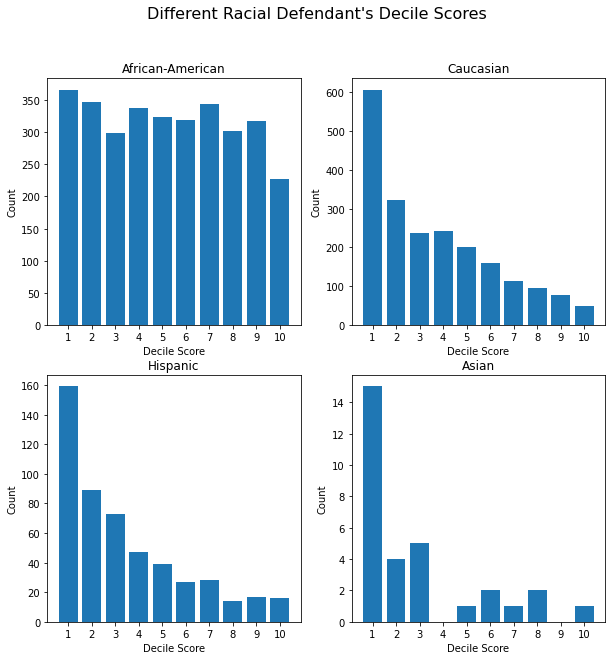

In [5]:
import matplotlib.pyplot as plt

data_black = df[df['race'] == 'African-American']
data_cas = df[df['race'] == 'Caucasian']
data_his = df[df['race'] == 'Hispanic']
data_asian = df[df['race'] == 'Asian']

count1 = (data_black['decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count2 = (data_cas['decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count3 = (data_his['decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count4 = (data_asian['decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
X = ['1','2','3','4','5','6','7','8','9','10']
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
plt.bar(X,np.array(count1))
plt.xlabel('Decile Score')
plt.ylabel('Count')
ax1.set_title("African-American")

ax2 = plt.subplot(222)
plt.bar(X,np.array(count2))
plt.xlabel('Decile Score')
plt.ylabel('Count')
ax2.set_title("Caucasian")

ax3 = plt.subplot(223)
plt.bar(X,np.array(count3))
plt.xlabel('Decile Score')
plt.ylabel('Count')
ax3.set_title("Hispanic")

ax4 = plt.subplot(224)
plt.bar(X,np.array(count4))
plt.xlabel('Decile Score')
plt.ylabel('Count')
ax4.set_title("Asian")

plt.suptitle("Different Racial Defendant's Decile Scores", fontsize = 16)
plt.savefig("C:/Users/86923/Desktop/Gradute/lecture/DS552/Final_Project/Different Racial Defendant's Decile Scores.png")
plt.show()

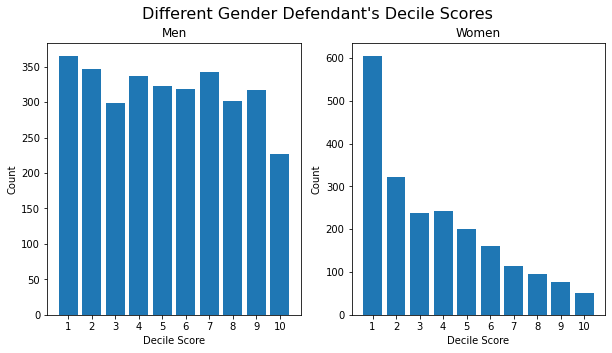

In [6]:
data_men = df[df['sex'] == 'Men']
data_women = df[df['sex'] == 'Women']

count1_ = (data_black['decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count2_ = (data_cas['decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)

X = ['1','2','3','4','5','6','7','8','9','10']
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.bar(X,np.array(count1_))
plt.xlabel('Decile Score')
plt.ylabel('Count')
ax1.set_title("Men")

ax2 = plt.subplot(122)
plt.bar(X,np.array(count2_))
plt.xlabel('Decile Score')
plt.ylabel('Count')
ax2.set_title("Women")

plt.suptitle("Different Gender Defendant's Decile Scores", fontsize = 16)
plt.savefig("C:/Users/86923/Desktop/Gradute/lecture/DS552/Final_Project/Different Gender Defendant's Decile Scores.png")
plt.show()

In [7]:
attr = ['sex','age_cat','race','priors_count','c_charge_degree','two_year_recid']

score = df['score_text']
score.replace('Low', 0, inplace=True)
score.replace('Medium', 1, inplace=True)
score.replace('High', 1, inplace=True)
#print(score.head())

newdata = df[attr]
newdata.replace('Male', 0, inplace=True)
newdata.replace('Female', 1, inplace=True)
newdata.replace('F', 0, inplace=True)
newdata.replace('M', 1, inplace=True)
#print(len(newdata))

E:\Anaconda3\envs\py38\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
from sklearn import preprocessing
def oneHotEnc(independent, cathegorical_name):
    # OnehotEcnoder one certain predictor
    enc = preprocessing.OneHotEncoder()
    one_hot = enc.fit_transform(independent[[cathegorical_name]]).toarray()

    # Repalce the cathegorical varibales by onehot vectors
    independent = independent.drop(cathegorical_name, axis=1)
    width = one_hot.shape[-1]
    one_hot_names = [cathegorical_name + f'{j}' for j in range(width)]
    independent[one_hot_names] = one_hot

    return independent

In [9]:
temp = ['age_cat', 'race']
for i in range(len(temp)):
    newdata = oneHotEnc(newdata, temp[i])
newdata.head()

,sex,priors_count,c_charge_degree,two_year_recid,age_cat0,age_cat1,age_cat2,race0,race1,race2,race3,race4,race5
0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,4,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,14,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
from sklearn.linear_model import LogisticRegression
# train model
clf = LogisticRegression(max_iter=1000).fit(newdata, score)
print(clf.coef_)
print(clf.intercept_)

[[ 0.21878281  0.26843873 -0.30990408  0.68301119  0.014039   -1.33129932
   1.31562718  0.48824903 -0.19916558  0.01062007 -0.41106077  0.90457165
  -0.79484755]]
[-1.54795182]


In [11]:
import statsmodels.api as sm
col = ['sex','priors_count','c_charge_degree','two_year_recid','age_cat0','age_cat1','age_cat2','race0','race1','race2','race3','race4','race5']
#model = sm.OLS("treatment~family_history+blood_pressure+gender+blood_test+TestB+GeneC+GeneB+age+MeasureA",corr_data).fit()
model = sm.OLS(score, newdata.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             score_text   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     250.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:41:09   Log-Likelihood:                -3300.8
No. Observations:                6172   AIC:                             6626.
Df Residuals:                    6160   BIC:                             6706.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sex                 0.0315      0.014     

### interpretation

In [12]:
import math
intcpt = math.exp(-1.54795) / (1 + math.exp(-1.54795))
pre_bw = math.exp(0.48825) / (1-intcpt + (intcpt * math.exp(0.48825)))
pre_wm = math.exp(0.21878) / (1-intcpt + (intcpt * math.exp(0.21878)))
pre_less25 = math.exp(1.31563) / (1-intcpt + (intcpt * math.exp(1.31563)))
print(pre_bw, pre_wm, pre_less25)

1.4674595083335837 1.1933723803788208 2.5212304606984195


## Risk of Violent Recidivism

In [2]:
import pandas as pd
rawdata1 = pd.read_csv('C:/Users/86923/Desktop/Gradute/lecture/DS552/Final_Project/compas-scores-two-years-violent.csv')
rawdata1.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [3]:
df1 = rawdata1[['age','c_charge_degree','race','age_cat','v_score_text','sex','priors_count','days_b_screening_arrest','v_decile_score', 'is_recid', 'two_year_recid']]
df1 = df1[df1['days_b_screening_arrest'] <= 30]
df1 = df1[df1['days_b_screening_arrest'] >= -30]
df1 = df1[df1['is_recid'] != -1]
df1 = df1[df1['c_charge_degree'] != "O"]
df1 = df1[df1['v_score_text'] != 'N/A']

In [4]:
print(df1['race'].value_counts())
print('\n')
print(df1['age_cat'].value_counts())
print('\n')
print(df1['v_score_text'].value_counts())
print('\n')
print(df1['sex'].value_counts())

African-American    1918
Caucasian           1459
Hispanic             355
Other                255
Asian                 26
Native American        7
Name: race, dtype: int64


25 - 45            2300
Greater than 45     954
Less than 25        766
Name: age_cat, dtype: int64


Low       2913
Medium     828
High       279
Name: v_score_text, dtype: int64


Male      3179
Female     841
Name: sex, dtype: int64


In [12]:
data_black1

,age,c_charge_degree,race,age_cat,v_score_text,sex,priors_count,days_b_screening_arrest,v_decile_score,is_recid,two_year_recid
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,1,1,1
10,41,F,African-American,25 - 45,Low,Male,0,-1.0,2,0,0
12,25,F,African-American,25 - 45,High,Male,3,-1.0,9,0,0
17,27,F,African-American,25 - 45,Low,Male,8,-1.0,3,1,1
19,33,F,African-American,25 - 45,Medium,Male,0,0.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4736,30,M,African-American,25 - 45,Low,Male,2,-1.0,3,0,0
4738,20,F,African-American,Less than 25,High,Male,0,-1.0,9,0,0
4739,23,F,African-American,Less than 25,Medium,Male,0,-1.0,5,0,0
4740,23,F,African-American,Less than 25,Medium,Male,0,-1.0,5,0,0


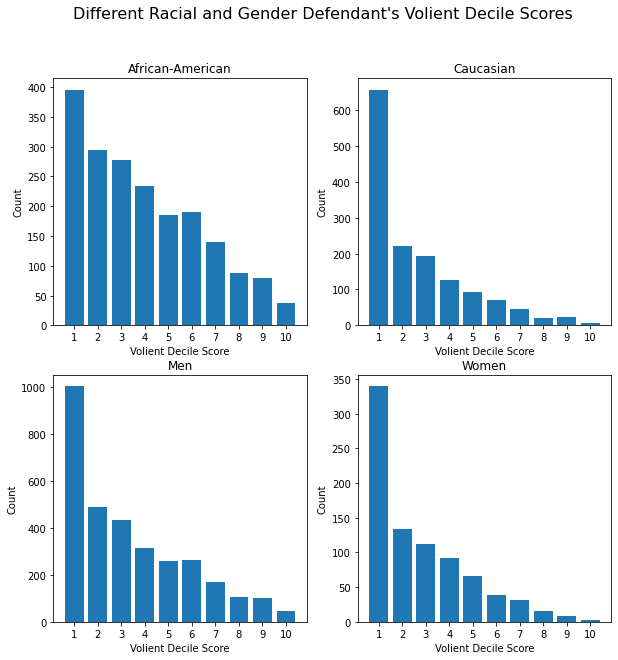

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data_black1 = df1[df1['race'] == 'African-American']
data_cas1 = df1[df1['race'] == 'Caucasian']
data_men1 = df1[df1['sex'] == 'Male']
data_women1 = df1[df1['sex'] == 'Female']

count11 = (data_black1['v_decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count21 = (data_cas1['v_decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count31 = (data_men1['v_decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
count41 = (data_women1['v_decile_score'].value_counts()).reindex([1,2,3,4,5,6,7,8,9,10],fill_value=0)
X = ['1','2','3','4','5','6','7','8','9','10']
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
plt.bar(X,np.array(count11))
plt.xlabel('Volient Decile Score')
plt.ylabel('Count')
ax1.set_title("African-American")

ax2 = plt.subplot(222)
plt.bar(X,np.array(count21))
plt.xlabel('Volient Decile Score')
plt.ylabel('Count')
ax2.set_title("Caucasian")

ax3 = plt.subplot(223)
plt.bar(X,np.array(count31))
plt.xlabel('Volient Decile Score')
plt.ylabel('Count')
ax3.set_title("Men")


ax4 = plt.subplot(224)
plt.bar(X,np.array(count41))
plt.xlabel('Volient Decile Score')
plt.ylabel('Count')
ax4.set_title("Women")

plt.suptitle("Different Racial and Gender Defendant's Volient Decile Scores", fontsize = 16)
plt.savefig("C:/Users/86923/Desktop/Gradute/lecture/DS552/Final_Project/Different racial and gender Defendant's Decile Scores.png")
plt.show()

In [17]:
attr1 = ['sex','age_cat','race','priors_count','c_charge_degree','two_year_recid']
score1 = df1['v_score_text']
newdata1 = df1[attr1]
newdata1.replace('Male', 0, inplace=True)
newdata1.replace('Female', 1, inplace=True)
newdata1.replace('F', 0, inplace=True)
newdata1.replace('M', 1, inplace=True)
# temp = ['age_cat', 'race']
for i in range(len(temp)):
    newdata1 = oneHotEnc(newdata1, temp[i])

score1.replace('Low', 0, inplace=True)
score1.replace('Medium', 1, inplace=True)
score1.replace('High', 1, inplace=True)

newdata1.head()

E:\Anaconda3\envs\py38\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,sex,priors_count,c_charge_degree,two_year_recid,age_cat0,age_cat1,age_cat2,race0,race1,race2,race3,race4,race5
0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# train model
clf1 = LogisticRegression(max_iter=1000).fit(newdata1, score1)
print(clf1.coef_)
print(clf1.intercept_)

[[-0.70820058  0.13624312 -0.16585985  0.92259999 -0.476188   -2.15474784
   2.63264393  0.66423137 -0.65335412  0.00831533 -0.05108617  0.21706625
  -0.18346458]]
[-1.76580465]


### interpretation

In [19]:
import math
intcpt1 = math.exp(-2.24274) / (1 + math.exp(-2.24274))
pre_bw_1 = math.exp(0.65893) / (1 - intcpt1 + (intcpt1 * math.exp(0.65893)))
pre_wm_1 = math.exp(-0.72890) / (1 - intcpt1 + (intcpt1 * math.exp(-0.72890)))
print(pre_bw_1,pre_wm_1)

1.7739209589164604 0.5076568257597058 0.19021430338902723


## Predictive Accuracy of COMPAS

In [20]:
import pandas as pd
rawdata2 = pd.read_csv('C:/Users/86923/Desktop/Gradute/lecture/DS552/Final_Project/cox-parsed.csv')
rawdata2.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0
1,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,334,961,0
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0
4,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,63,64,1


In [22]:
print(len(rawdata2))
df2 = rawdata2[['race','score_text','start','end','event']]
index = []
time = []
for i in range(len(df2)):
    if df2.loc[i]['end'] <= df2.loc[i]['start']:
        index.append(i)
    else:
        time.append(df2.loc[i]['end'] - df2.loc[i]['start'])
df2 = df2.loc[~df2.index.isin(index)]
df2 = df2[df2['score_text'] != 'N/A']
df2 = df2[df2['start'] != 'N/A']
df2 = df2[df2['end'] != 'N/A']
df2 = df2[df2['event'] != 'N/A']
df2.drop_duplicates()

13419


,race,score_text,start,end,event
0,Other,Low,0,327,0
1,Other,Low,334,961,0
2,African-American,Low,9,159,1
3,African-American,Low,0,63,0
4,African-American,Low,63,64,1
...,...,...,...,...,...
13413,African-American,Low,1,790,0
13414,African-American,Medium,9,459,0
13415,Other,Low,0,808,0
13417,Hispanic,Low,0,258,0


In [23]:
df2['race'].value_counts()

African-American    6865
Caucasian           4572
Hispanic            1148
Other                670
Asian                 59
Native American       42
Name: race, dtype: int64

In [24]:
df2['time']=time
df2 = df2[['race','score_text','time','event']]
temp = ['race']
for i in range(len(temp)):
    df2 = oneHotEnc(df2, temp[i])
df2.replace('Low', 0, inplace=True)
df2.replace('Medium', 1, inplace=True)
df2.replace('High', 2, inplace=True)
df2.dropna(axis=0, inplace=True)
df2.head()

,score_text,time,event,race0,race1,race2,race3,race4,race5
0,0.0,327,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,627,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,150,1,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,63,0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='log(HR) (95% CI)'>

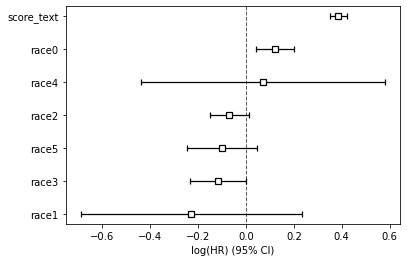

In [25]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.1)#Cox Proportional Hazards mode
cph.fit(df2, duration_col='time', event_col='event')
cph.plot()

In [26]:
# the COMPAS system's concordance 63.6%. This is lower than the accuracy quoted in the Northpoint study of 68%.
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 13344 total observations, 9875 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 13344
number of events observed = 3469
   partial log-likelihood = -31161.06
         time fit was run = 2021-03-22 14:42:35 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
score_text   0.39       1.47       0.02             0.35             0.42                 1.42                 1.52
race0        0.12       1.13       0.04             0.04             0.20                 1.04                 1.22
race1       -0.23       0.80       0.24            -0.69             0.23                 0.50                 1.26
race2       -0.07       0.93       0.04            -0.15             0.01                 0.86                 1.01
race3       -0.12       0.89       0.06            -0.24            -0.00                 0.79                 1.00
race4        0.07       1.07       0.26            -0.44             0.58                 0.64                 1.79
race5       -0.10       0.91       0.07            -0.24             0.05                 0.78                 1.05

               z      p   -log2(p)
covariate                         
score_text 21.30 <0.005     332.14
race0       3.06 <0.005       8.83
race1      -0.97   0.33       1.58
race2      -1.69   0.09       3.47
race3      -1.99   0.05       4.41
race4       0.27   0.79       0.35
race5      -1.34   0.18       2.48
---
Concordance = 0.63
Partial AIC = 62336.13
log-likelihood ratio test = 569.06 on 7 df
-log2(p) of ll-ratio test = 391.83